## Project Overview

In this project, we will use multiple linear regression to predict health insurance premiums based on various customer attributes. 

Our goal is to develop a model that can estimate insurance costs using features such as `age`, `gender`, `BMI`, `number of children`, `smoking habits`, and `geographical location`:
- sex: insurance contractor gender, female, male
- bmi: Body mass index (ideally 18.5 to 24.9)
- children: Number of children covered by health insurance / Number of dependents
- smoker: smoking habits
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

We’ll work with real-world data and utilise AWS SageMaker to build and refine our regression model. This project will enhance our understanding of how to handle multiple inputs and apply regression techniques to practical scenarios. 

## Multiple Linear Regression

Multiple linear regression predicts a dependent variable using two or more independent variables. It extends simple linear regression by incorporating multiple predictors. The model's formula is:

$[ y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip} + \epsilon ]$

**Key Assumptions:**
1. **Linearity:** Linear relationship between dependent and independent variables.
2. **No Multicollinearity:** Independent variables should not be highly correlated.
3. **Constant Variance:** Residuals (i.e. actual_value - predicted_value) should have constant variance (homoscedasticity) - spread or dispersion of the residuals should not change as the value of the predictor variables changes.
4. **Independence:** Observations should be independent.
5. **Normality:** Residuals should be normally distributed.

This technique helps analyze the impact of multiple factors on a single outcome.

Here,  
y = Dependant variable insurance cost ($)  
x = Independent variables (age, gender, BMI...etc.)

### Regression Metrics Overview
These metrics provide insight into how well the model's predictions match the true data, often used when comparing different models or algorithms to see which one has the lowest error value.

**1. Mean Absolute Error (MAE)**  
- **Definition**: Average of absolute differences between model predictions and actual values.
- **Formula**: $[ \text{MAE} = \frac{1}{N} \sum_{i=1}^N |Y_i - \hat{Y}_i| ]$
- **Interpretation**: Measures the average magnitude of errors without considering their direction. Lower MAE indicates a better model fit.

**2. Mean Squared Error (MSE)**  
- **Definition**: Average of squared differences between model predictions and actual values.
- **Formula**: $[ \text{MSE} = \frac{1}{N} \sum_{i=1}^N (Y_i - \hat{Y}_i)^2 ]$
- **Interpretation**: Penalizes larger errors more than MAE due to squaring. Sensitive to outliers; larger errors are more heavily weighted.

**3. Root Mean Squared Error (RMSE)**  
- **Definition**: Square root of the mean squared error.
- **Formula**: $[ \text{RMSE} = \sqrt{\text{MSE}} ]$
- **Interpretation**: Represents the standard deviation of residuals, providing a measure of error in the same units as the output. Easier to interpret compared to MSE.

**4. Mean Absolute Percentage Error (MAPE)**  
- **Definition**: Average of absolute percentage errors between predictions and actual values.
- **Formula**: $[ \text{MAPE} = \frac{1}{N} \sum_{i=1}^N \left| \frac{Y_i - \hat{Y}_i}{Y_i} \right| \times 100\% ]$
- **Interpretation**: Expresses error as a percentage, making it easier to understand. Limited by issues when actual values are zero.

**5. Mean Percentage Error (MPE)**  
- **Definition**: Average of percentage errors without taking absolute values.
- **Formula**: $[ \text{MPE} = \frac{1}{N} \sum_{i=1}^N \frac{Y_i - \hat{Y}_i}{Y_i} \times 100\% ]$
- **Interpretation**: Shows the direction of errors (positive or negative). Useful for understanding bias in predictions.

**Key Points**:
- **MAE**: Simple, interpretable; doesn't penalize large errors as much.
- **MSE**: Sensitive to outliers; larger errors have a greater impact.
- **RMSE**: Provides error in the same units as the output; interpretable.
- **MAPE**: Useful for percentage-based error interpretation; issues with zero actual values.
- **MPE**: Indicates error direction and magnitude without absolute values.


#### R-squared and Adjusted R-squared Overview
These measures determine the proportion of the variance in the dependent variable that is predictable from the independent variables. It gives an overall measure of how well the model fits the data - useful for comparing the explanatory power of different models. These helps in understanding the impact of adding or removing features. While R² might increase with more features, it's crucial to balance it with other metrics to avoid overfitting. Adjusted R² can be used here to account for the number of predictors.

**1. R-squared (Coefficient of Determination)**  
- **Definition**: Measures the proportion of variance in the dependent variable that is explained by the independent variables in the model.
- **Formula**: $[ R^2 = 1 - \frac{\sum (Y_i - \hat{Y}_i)^2}{\sum (Y_i - \bar{Y})^2} ]$
- **Interpretation**: Indicates how well the model explains the variability of the dependent variable. An R-squared of 80% means 80% of the variation in the dependent variable is explained by the model.
- **Maximum Value**: 1 (perfect fit).  
- **Minimum Value**: 0 (no explanatory power).  
- **Usage**: Helps assess the goodness of fit; higher values indicate a better model fit. However, R-squared can be misleading if irrelevant predictors are added, as it always increases with more predictors.

**2. Adjusted R-squared**  
- **Definition**: Adjusted R-squared modifies R-squared to account for the number of predictors in the model, penalizing the inclusion of irrelevant variables.
- **Formula**: $[ \text{Adjusted } R^2 = 1 - \left( \frac{1 - R^2}{1 - \frac{N - 1}{N - K - 1}} \right) ]$ or<br/>
$\text{Adjusted } R^2 = 1 - (1-R^2)(K - 1)/(N - K - 1)$
  - Where \( K \) is the number of predictors(/features), and \( N \) is the number of observations.
- **Interpretation**: Provides a more accurate measure of model fit by adjusting for the number of predictors. It only increases if a new predictor improves the model more than would be expected by chance.
- **Usage**: Useful for comparing models with different numbers of predictors; it penalizes the inclusion of non-informative variables, offering a more reliable measure of fit.

**Key Points**:
- **R-squared**: Indicates the proportion of variance explained but can be artificially inflated with more predictors.
- **Adjusted R-squared**: Corrects R-squared for the number of predictors, making it a better metric for model comparison and avoiding the pitfalls of overfitting.

These metrics are crucial for evaluating regression models and ensuring that they effectively explain the variability in the data.

## Set-up

In [3]:
# SET MODULE PATH TO ACCESS OTHER PYTHON CODES
from pathlib import Path
import sys
import os

def _set_module_path(dir_level_up: str) -> None:
    """In Jupyter Lab, the __file__ variable is not available as it is not a standalone script, but rather an interactive environment.
    Instead, you can use Path.cwd() to get the current working directory.
    """
    # Create a Path object for the current working directory
    current_dir = Path(globals().get("__vsc_ipynb_file__")) if "__vsc_ipynb_file__" in globals() else Path.cwd() #  #Path(__vsc_ipynb_file__)

    # Create a Path object for the directory level up
    script_dir = current_dir / dir_level_up

    # Get the absolute path of the script_dir
    script_dir_abs = script_dir.resolve()

    sys.path.append(str(script_dir_abs))
    return str(script_dir_abs)


root_path = _set_module_path("../../..")
os.chdir(root_path)
print(f"Project root directory: {root_path}")
print(f"python running from: {sys.executable}")
# print(sys.prefix)
# !which python
!which pip
# !pwd
# envrc_path = f"{root_path}/.envrc"
# print(f"envrc_path: {envrc_path}")

Project root directory: /Users/arifur.rahman/projects/scratchpad/predictive-analysis-sagemaker
python running from: /Users/arifur.rahman/projects/scratchpad/predictive-analysis-sagemaker/.venv/bin/python
/Users/arifur.rahman/projects/scratchpad/predictive-analysis-sagemaker/.venv/bin/pip


In [4]:
from dotenv import load_dotenv, find_dotenv

for f_env in [".env", ".env.override"]:
    load_dotenv(find_dotenv(f_env))
# load_dotenv(dotenv_path="../.env")


print(os.getcwd())
print(os.getenv("ENVIRONMENT"))

/Users/arifur.rahman/projects/scratchpad/predictive-analysis-sagemaker
dev


### Logger definition

In [5]:
from predictive_analysis_sagemaker.src.logger_utils import logger


logger.info(os.environ.get("ENVIRONMENT"))
logger.error(os.environ.get("ENVIRONMENT"))

[2024-09-17 15:17:16][3417429718.py(4)][<module>()]INFO: dev
[2024-09-17 15:17:16][3417429718.py(5)][<module>()]ERROR: dev


## Import libraries and datasets

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

In [37]:
df_premium = pd.read_csv("./data/raw/insurance.csv")
display(df_premium.head(3))  # tail(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


## Exploratory Data Analysis

Is any value null: False
Is there any null value: age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


<Axes: >

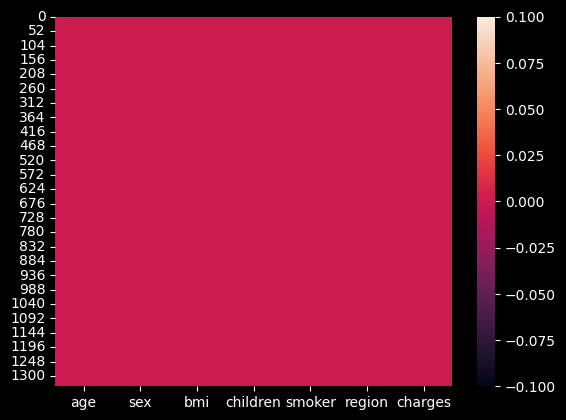

In [8]:
# Check for Null values
print(f"Is any value null: {df_premium.isnull().any().any()}")
print(f"Is there any null value: {df_premium.isnull().sum()}")

sns.heatmap(df_premium.isnull())

In [9]:
# Check dataframe info
df_premium.info()
# All 1338 entries are complete with no missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df_premium.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Comment:**

1. **Age**: The mean age is 39 years with a range from 18 to 64. Given this broad range and the fact that medical expenses often increase with age, `age` is expected to be a significant predictor of `charges`. The standard deviation of 14.05 years indicates variability, supporting the idea that age-related health costs will vary substantially.

2. **BMI**: With a mean BMI of approximately 30.66 and a standard deviation of 6.10, there is significant variability in BMI values. This variability, along with the known relationship between higher BMI and increased health risks, suggests that `bmi` will be an important predictor of `charges`.

3. **Smoker**: Although not explicitly detailed in the descriptive statistics, smoking status typically has a major impact on healthcare costs due to increased health risks. If the `smoker` variable reflects this common understanding, it will likely be a strong predictor of `charges`. 

4. **Region**: The dataset includes a `region` column, implying regional variability in healthcare costs. This is supported by the data's substantial variability in `charges`, indicating that regional differences are likely to affect the prediction of `charges`.

5. **Children**: The number of children ranges from 0 to 5, with a mean of about 1.09. While the range and mean suggest that having more children could affect medical charges (e.g., through family health insurance costs), this effect is expected to be less pronounced compared to `age`, `bmi`, and `smoker` status.

6. **Sex**: The dataset includes a `sex` column, but the descriptive statistics do not show a clear difference in medical charges by gender. Although gender may still impact healthcare costs, its effect might be less significant compared to the other features.

**Rationale**: The provided data shows considerable variability in `age`, `bmi`, and `charges`, supporting their strong influence on healthcare costs. The `smoker` status aligns with known impacts of smoking on health expenses. Regional differences in healthcare costs are suggested by the variability in `charges`, making `region` a relevant predictor. `Children` and `sex` are likely to have some effect, but the data suggests their impact may be less direct compared to the primary predictors.

In [28]:
def groupby_plot(column: str):
    # Grouping by column to see any relationship between `column` and charges
    df_column = df_premium.groupby([column]).mean(numeric_only=True)
    # print(f'{df_column.describe()}')
    display(df_column)

    # Plot charges by column
    plt.figure(figsize=(10, 6))
    # Plot charges
    plt.plot(df_column.index, df_column["charges"], label="Charges", marker="o")
    # for column in df_column.columns:
    #     if column != "charges":
    #         plt.plot(df_column.index, df_column[column], label=column, linestyle='--')

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


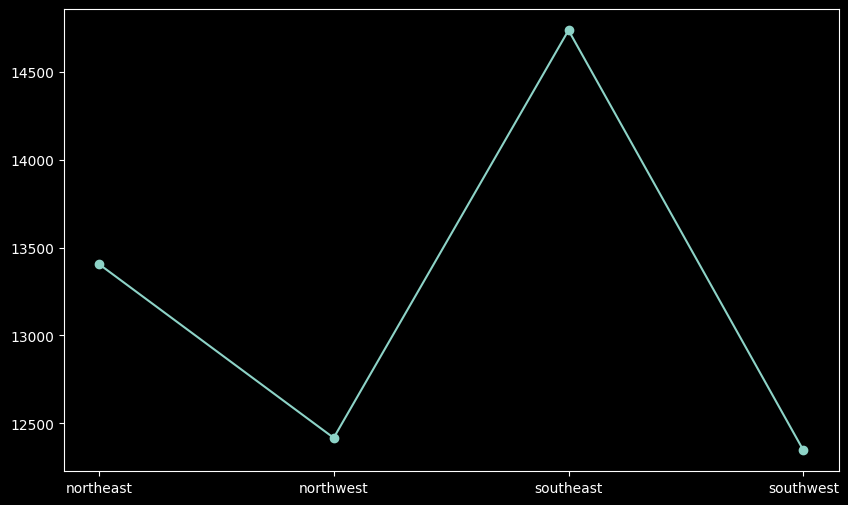

In [29]:
groupby_plot("region")

The southeast region has comparatively higher charges which seem strongly correlated with its higher average BMI. Since BMI is a known risk factor for various health issues, this suggests that BMI could be a key driver of healthcare costs and insurance charges in this region.

In contrast, the northwest and southwest regions have lower average charges, and their BMIs are also lower highlightingthe relation between BMI and charges. 

However, age and number of children show small variation across regions and may have a smaller impact on the charges.

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


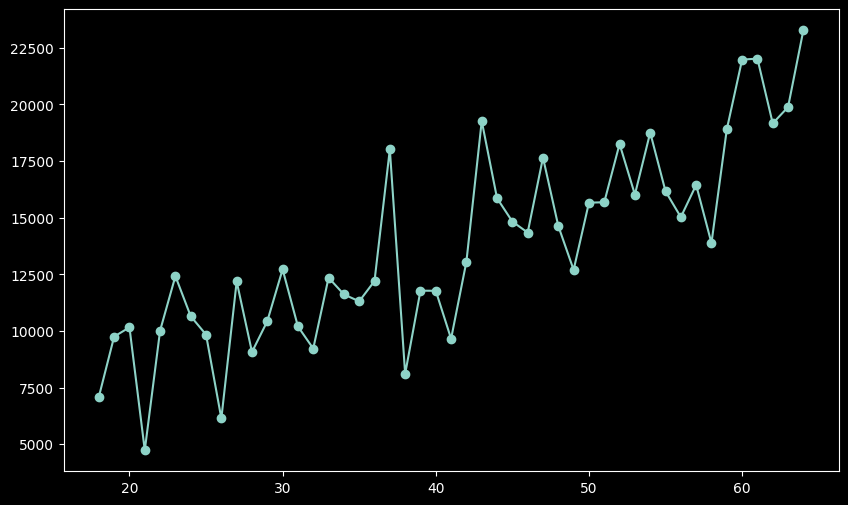

In [30]:
groupby_plot("age")

Insurance premium harges tend to increase significantly with age, particularly for individuals in their late 40s and beyond. This is very expected as it is common to have more health issues as we grow older.

,age,children,charges
bmi,,,
15.960,18.000000,0.000000,1694.796400
16.815,29.500000,1.500000,4904.000350
17.195,26.000000,2.000000,14455.644050
17.290,27.666667,1.333333,7813.353433
17.385,23.000000,1.000000,2775.192150
...,...,...,...
48.070,46.000000,2.000000,9432.925300
49.060,58.000000,0.000000,11381.325400
50.380,23.000000,1.000000,2438.055200


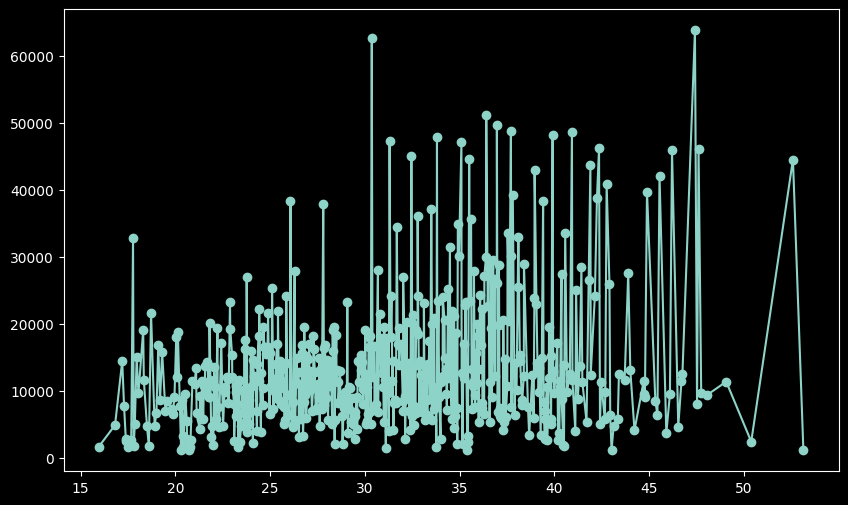

In [31]:
groupby_plot("bmi")

It seems that premium charges are comparative high for people with BMI above 30

## Pre-process categorical data

In [32]:
df_premium.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [33]:
for category_col in ["sex", "smoker", "region"]:
    print(f"Unique values for category [{category_col}]: {df_premium[category_col].unique()}")

Unique values for category [sex]: ['female' 'male']
Unique values for category [smoker]: ['yes' 'no']
Unique values for category [region]: ['southwest' 'southeast' 'northwest' 'northeast']


In [38]:
# Use Label Encoding for `sex` and `smoker` column, where as one-hot encoding for `region`

# Label Encoding (another option is sklearn.preprocessing.LabelEncoder)
df_premium["sex"] = df_premium["sex"].apply(lambda x: 0 if x == "female" else 1)  # female=0, male=1
df_premium["smoker"] = df_premium["smoker"].apply(lambda x: 0 if x == "no" else 1)  # no=0, yes=1

# One-Hot Encdoing (another option is sklearn.preprocessing.OneHotEncoder)
region_dummies = pd.get_dummies(
    df_premium["region"], drop_first=True, dtype=int
)  # Get k-1 dummies out of k categorical levels by removing the first level.
display(region_dummies)

df_premium = pd.concat([df_premium, region_dummies], axis=1)
display(df_premium.head())

df_premium.drop(["region"], axis=1, inplace=True)
display(df_premium.head())

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [39]:
df_premium.describe()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000


## Data Visualisation

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

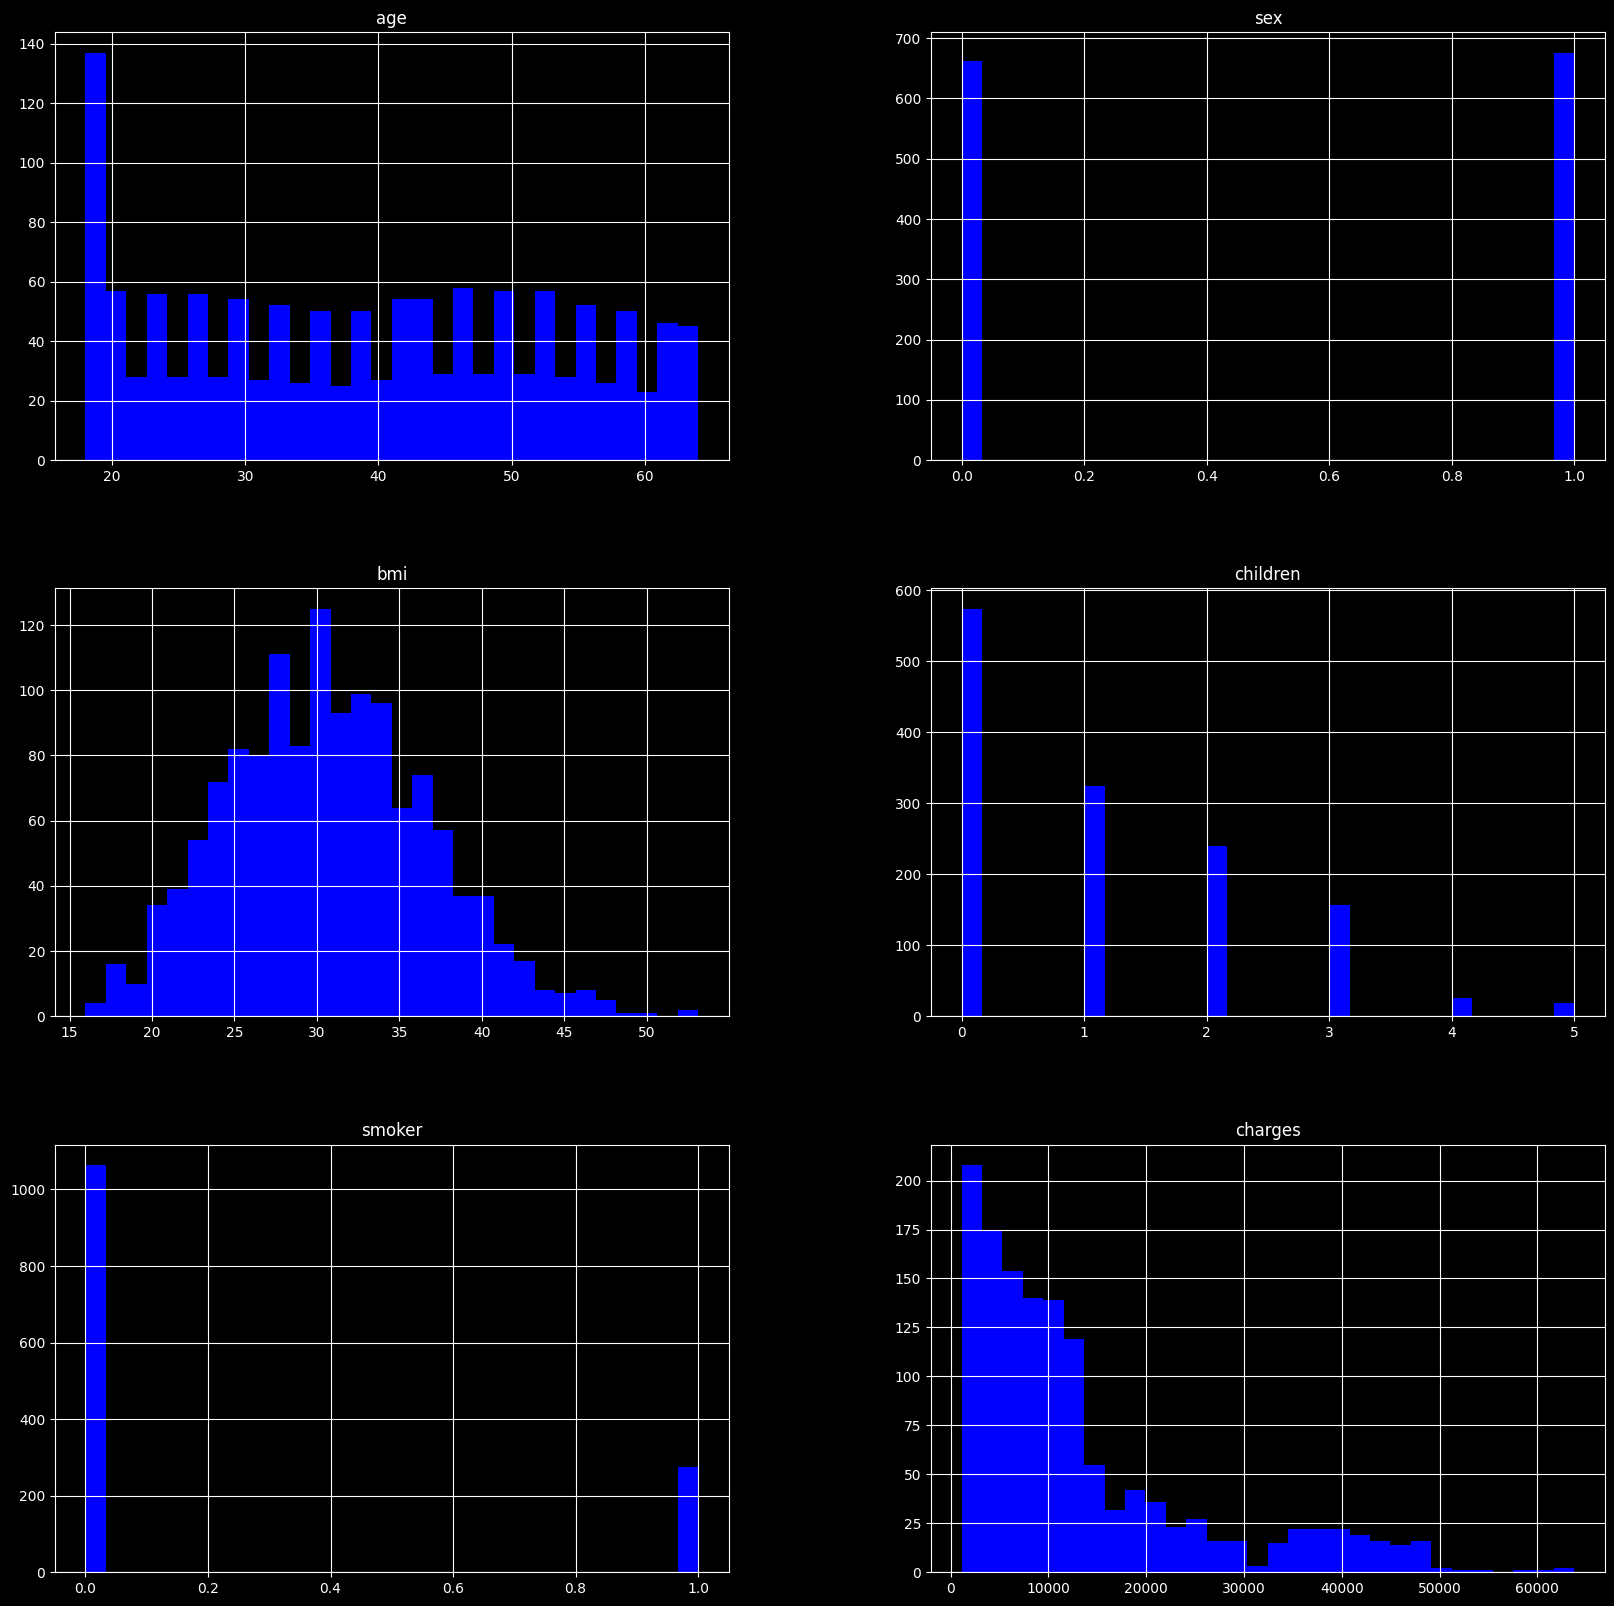

In [42]:
# Plot histogram for coloumns
hist_columns = ["age", "sex", "bmi", "children", "smoker", "charges"]
df_premium[hist_columns].hist(bins=30, figsize=(20, 20), color="b")

**Histogram Data Observation**

- **age:** highest frequency is observed in younger age group and gradually declines as age increases in this dataset
- **sex:** almost similar concentration for both male and female
- **bmi:** the bmi is to somewhat normally distributed with highest frequency in the mid-BMI ranges indicating concentration around overweight and mildly obese ranges.
- **children:** most of the insurance holder don't have any children with significant drop for larger families.
- **smoker:** mostly non-smoker
- **charges:** majority of the individuals pay lower charges with very few in the top brackets.

In [59]:
def calc_hist_data(col_series: str, n_bins: int = 30):
    # Calculate histogram data
    hist, bins = pd.cut(col_series, bins=n_bins, retbins=True, include_lowest=True)
    hist_table = pd.value_counts(hist)  # .sort_index()
    display(hist_table)


calc_hist_data(df_premium["smoker"], n_bins=2)

smoker
(-0.002, 0.5]    1064
(0.5, 1.0]        274
Name: count, dtype: int64

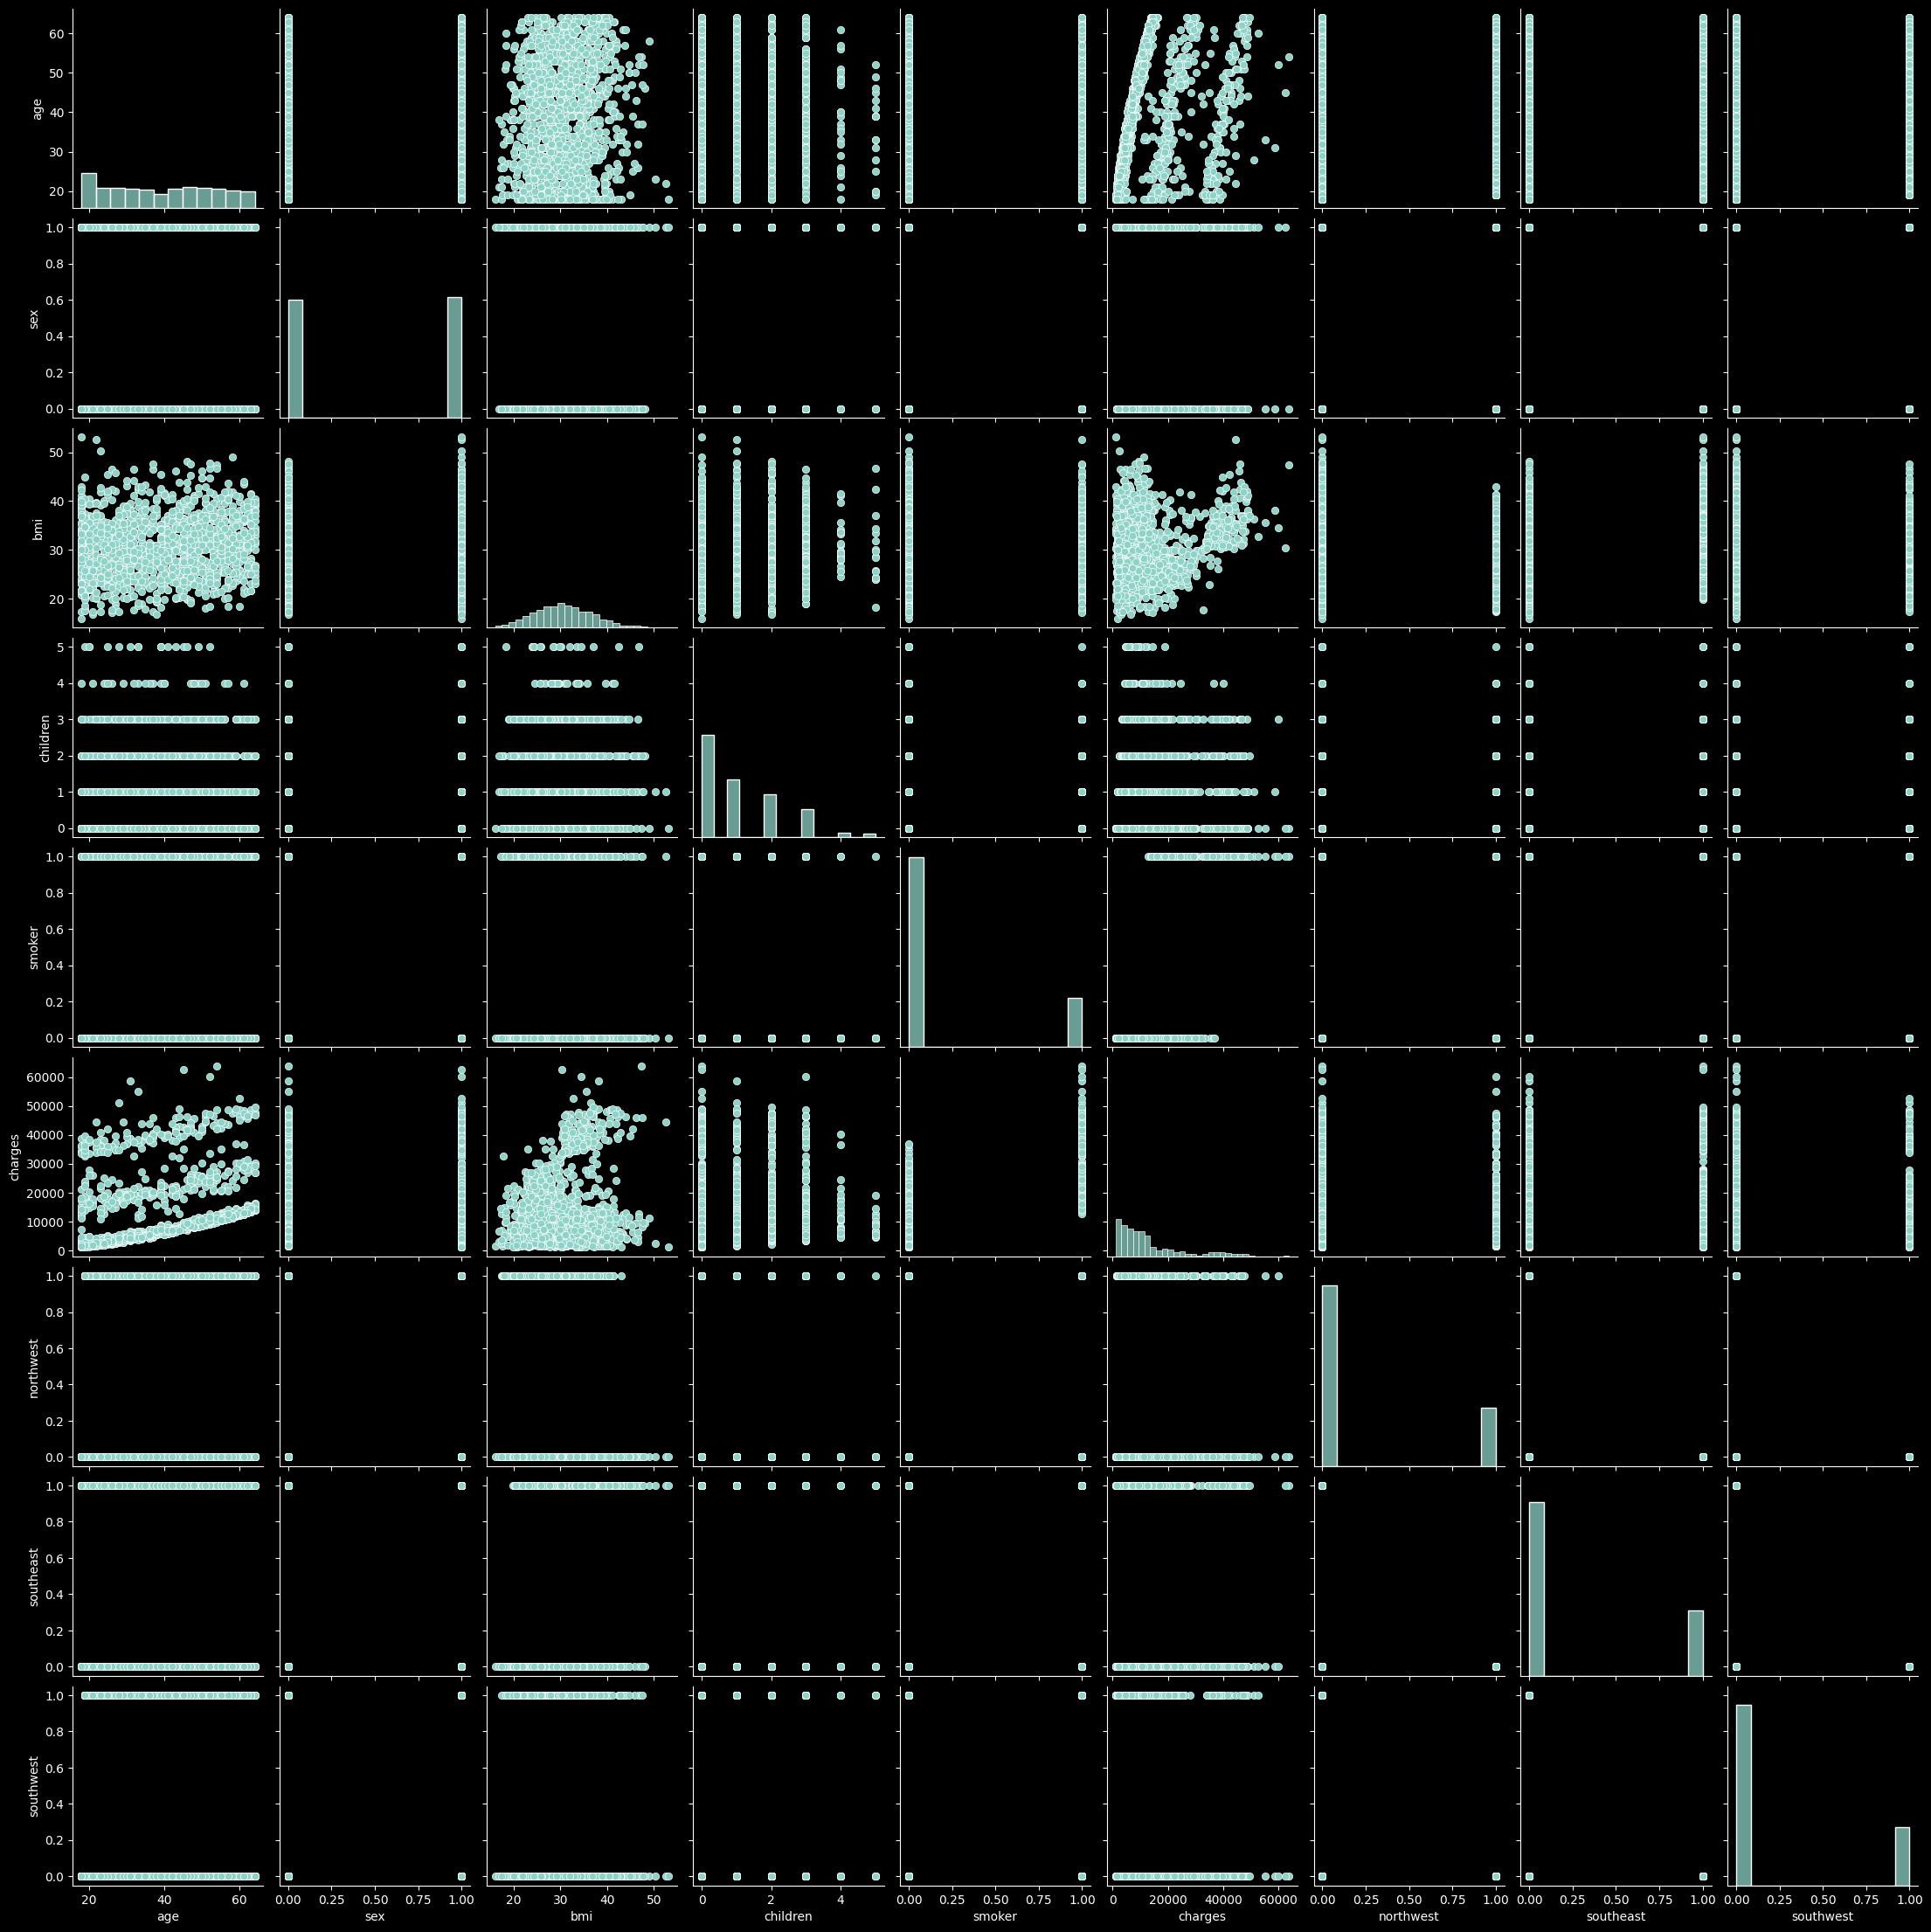

In [60]:
# plot pairplot
sns.pairplot(df_premium)

The relationship between age and charges is slightly linear, but the data is complex with significant variation, making simple linear models less effective.

### Regression Plot

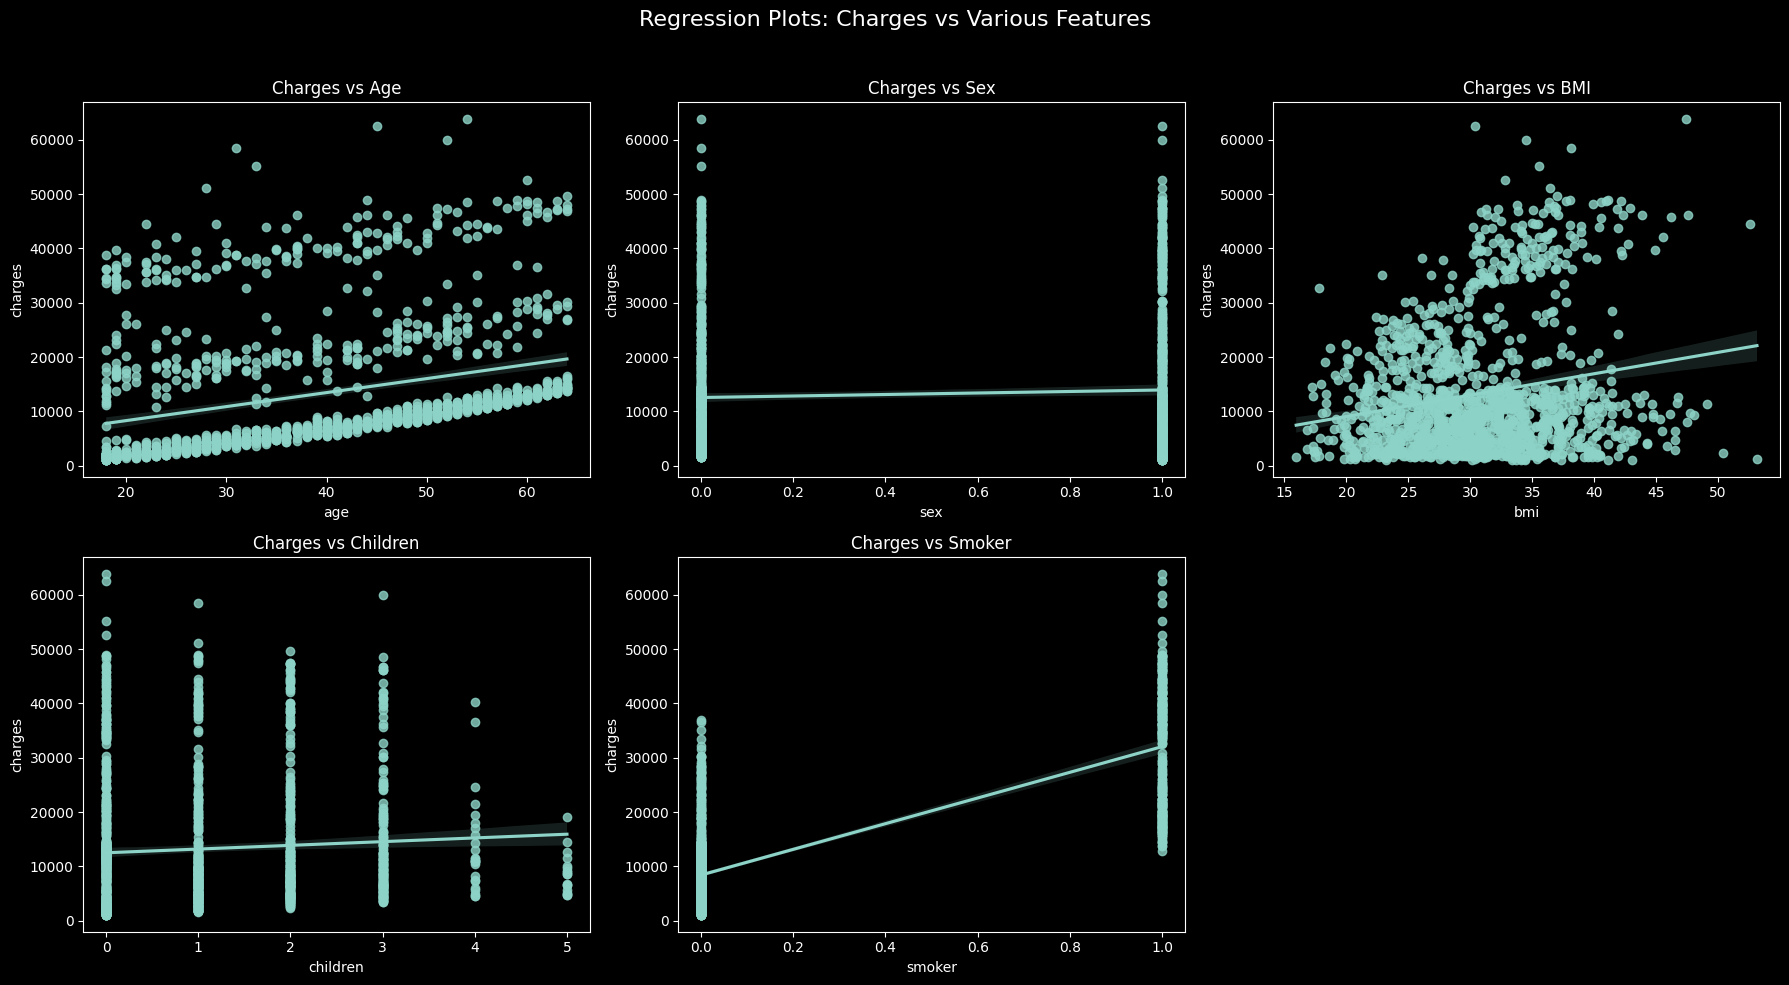

In [62]:
# Set up the matplotlib figure with subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Regression Plots: Charges vs Various Features", fontsize=16)

# List of feature names and axis titles for the subplots
features = ["age", "sex", "bmi", "children", "smoker"]
titles = ["Age", "Sex", "BMI", "Children", "Smoker"]

# Loop through the features to create subplots
for i, feature in enumerate(features):
    row, col = divmod(i, 3)  # Compute row and column index
    sns.regplot(x=feature, y="charges", data=df_premium, ax=axes[row, col])
    axes[row, col].set_title(f"Charges vs {titles[i]}")

# Hide the 6th subplot (bottom right) if not used
axes[1, 2].set_visible(False)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
plt.show()

In analyzing the regression plots, it becomes evident that the relationship between insurance charges and other features, such as age, BMI, and smoker status, is not strictly linear. The data points are scattered, and there is no clear, consistent pattern that can be confidently established to predict charges using a simple linear approach. This lack of a strong linear relationship suggests that **Linear Multivariate Regression** would struggle to accurately predict insurance premium charges.

Given the complexity and variation within the data, a more sophisticated model—such as non-linear regression techniques or advanced algorithms like **XGBoost** or **Artificial Neural Networks**—would likely yield better results in capturing the nuances and improving the prediction accuracy for insurance premiums.

### Correlation Matrix

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


<Axes: >

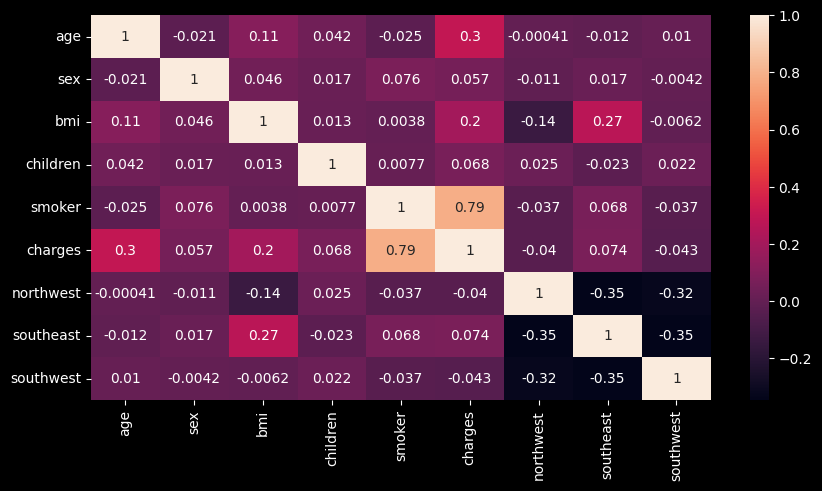

In [66]:
corr = df_premium.corr()
display(corr)
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True)

- **Smoker status** has the strongest correlation with charges (0.79), indicating a significant impact on premium costs.
- **Age** has a moderate positive correlation (0.30), with older individuals incurring higher charges.
- **BMI** shows a weak positive correlation (0.20), suggesting a limited influence on charges.
- **Sex, children, and region** have minimal correlation with charges, indicating little impact on premiums.

Even though there is some correlation between smoker status, age, and BMI with charges, please note that the relationship is not strictly linear, as shown in the regression plot above.

## Training and Testing Dataset

In [68]:
print(f"All columns: {df_premium.columns}")

All columns: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')


In [71]:
# Remove the target variable
X = df_premium.drop(columns=["charges"])
y = df_premium["charges"]
display(X.head())
display(y.head())
print(f"X.shape: {X.shape}, y.shape: {y.shape}")

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0


0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

X.shape: (1338, 8), y.shape: (1338,)


In [73]:
# Convert to numpty array
X_np = np.array(X).astype("float32")
y_np = np.array(y).astype("float32")

# Convert into batch format
y_np = y_np.reshape(-1, 1)
print(f"X_np.shape: {X_np.shape}, y_np.shape: {y_np.shape}")

X_np.shape: (1338, 8), y_np.shape: (1338, 1)


### Scale the data

We need to scale the data before feeding it into a machine learning model because many models, like linear regression, SVMs, and neural networks, are sensitive to the magnitude of features. Unscaled data can lead to:
- **Poor model performance**: Models may struggle to converge or give biased importance to larger-valued features.
- **Longer training times**: Optimization algorithms may take longer to find the optimal solution.

**When to scale**: Look for algorithms that use distance-based metrics (e.g., k-NN, SVM) or gradient-based optimizers (e.g., neural networks) and ensure that features are on a similar scale (using techniques like standardization or normalization).

In [75]:
from sklearn.preprocessing import StandardScaler  # , MinMaxScaler

scaler_X = StandardScaler()
X = scaler_X.fit_transform(X_np)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y_np)

## Split data into train and test set

In [77]:
from sklearn.model_selection import train_test_split

# Note: train_test_split splits and shuffles the data to avoid model learning the order of data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f"{X_train.shape}: {type(X_train)}\n{X_test.shape}\n{y_train.shape}\n{y_test.shape}")

(1070, 8): <class 'numpy.ndarray'>
(268, 8)
(1070, 1)
(268, 1)


## Linear Regression model using scikit-learn (locally)

In [78]:
from sklearn.linear_model import LinearRegression

lin_regress_sklearn = LinearRegression(fit_intercept=True)
# fit_intercept=True means in `y=mX+b`, b can be non-zero, whereas False forces b=0 i.e. fitted line goes throug origin
lin_regress_sklearn.fit(X_train, y_train)

LinearRegression()

In [81]:
lin_regress_sklearn_accuracy = lin_regress_sklearn.score(X_test, y_test)
print(f"Accuracy: {lin_regress_sklearn_accuracy}")

Accuracy: 0.7238747477531433


In [82]:
# Predict y for test data
y_predict = lin_regress_sklearn.predict(X_test)

In [83]:
y_test_unscaled = scaler_y.inverse_transform(y_test)
y_predict_unscaled = scaler_y.inverse_transform(y_predict)

In [84]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

MSE = mean_squared_error(y_test_unscaled, y_predict_unscaled)  # Mean Squared Error
RMSE = np.sqrt(MSE)  # Root Mean Squared Error

In [85]:
MAE = mean_absolute_error(y_test_unscaled, y_predict_unscaled)  # Mean Absolute Error
r2 = r2_score(y_test_unscaled, y_predict_unscaled)

N = len(y_test)  # number of observations
K = X_test.shape[1]  # number of predictors(/features)
print(f"number of observations: {N} and number of predictors(/features): {K}")
adjusted_r2 = 1 - (1 - r2) * (N - 1) / (N - K - 1)
print(f"MSE: {MSE}\nRMSE: {RMSE}\nMAE: {MAE}\nR-squared Error:{r2}\nAdjusted R-squared Error: {adjusted_r2}")

number of observations: 268 and number of predictors(/features): 8
MSE: 38314508.0
RMSE: 6189.87158203125
MAE: 4039.03125
R-squared Error:0.7238747477531433
Adjusted R-squared Error: 0.7153457824327771


**Comment:**
- The Mean Squared Error (MSE) of approximately 38,314,508 indicates that, on average, the squared differences between the predicted and actual values are quite high.   

- The Root Mean Squared Error (RMSE) of about 6,190 provides a more interpretable measure of error, suggesting that typical prediction errors are around this value. Considering the mean charges as $13270.42, the prediction error is quite hight which is not acceptable.  

- The Mean Absolute Error (MAE) of approximately 4,039 is useful for understanding the average magnitude of errors.  

- The R-squared value of approximately 0.724 indicates that about 72.4% of the variance in the dependent variables is explained by the predictors indicating the the model captures a substantial amount of the underlying patterns in the data.  

- Adjusted R-squared: The adjusted R-squared of about 0.715 is close to the R-squared, suggesting that the inclusion of the predictors is justifiable and that they collectively contribute to explaining the variability in the response variable. The minor difference indicates that the model is well-specified without excessive noise from unimportant variables.

## Linear Learner model using Sagemaker

### Get Execution Role

In [ ]:
import sagemaker
import boto3

org = "coai"
sagemaker_session = sagemaker.Session()
bucket = f"{org}-sagemaker-studio"
prefix = "linear_learner"  # prefix is the subfolder within the

# Let's get the execution role for the notebook instance.
# This is the IAM role that you created when you created your notebook instance. You pass the role to
# Note that AWS Identity and Access Management (IAM) role that Amazon SageMaker can assume to perforn
role = sagemaker.get_execution_role()
print(role)

### Prepare Data and Save in S3

In [88]:
print(f"X_train.shape: {X_train.shape}\ny_train.shape: {y_train.shape}")
y_train = y_train[:, 0]  # Make sure the target label is in a vector
print(f"X_train.shape: {X_train.shape}\ny_train.shape: {y_train.shape}")

X_train.shape: (1070, 8)
y_train.shape: (1070, 1)
X_train.shape: (1070, 8)
y_train.shape: (1070, 1)


(1070,)

In [89]:
print(f"X_test.shape: {X_test.shape}\ny_test.shape: {y_test.shape}")
y_test = y_test[:, 0]  # Make sure the target label is in a vector
print(f"X_test.shape: {X_test.shape}\ny_test.shape: {y_test.shape}")

X_test.shape: (268, 8)
y_test.shape: (268, 1)
X_test.shape: (268, 8)
y_test.shape: (268,)


In [ ]:
import io  # for dealing with various types of I/O
import sagemaker.amazon.common as smac  # Sagemaker common library

# Convert numpy array to RecordIO format
# For training, the linear learner algorithm supports both recordIO-wrapped protobuf and CSV formats
buf = io.BytesIO()  # in-memory buffer for byte array writing
smac.write_numpy_to_dense_tensor(buf, X_train, y_train)
buf.seek(0)  # in-memory byte arrays, it increments 1 every time while writing. Reset to 0

0

In [ ]:
# Upload RecordIO data (from buffer) to S3
import os

# key refers to file name
key = "multi_linear-train-data"

# upload
boto3.resource("s3").Bucket(bucket).Object(os.path.join(prefix, "train", key)).upload_fileobj(buf)

# Training data location in S3
s3_train_data = f"s3://{bucket}/{prefix}/train/{key}"
print(f"Uploaded training data location: {s3_train_data}")

In [ ]:
# Output location in S3 for Linaear Learner model

output_location = f"s3://{bucket}/{prefix}/output"
print(f"Training artifacts will be stored in {output_location}")

### Get linear-learner container image in sagemaker

In [ ]:
# Get the training container of sagamaker built-in algorithms
# specify the name of the algorithm

# Note all regression models are named `estimators`

from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, "linear-learner")

[2024-09-14 11:10:45][deprecations.py(34)][_warn()]WARNING: The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
[2024-09-14 11:10:45][image_uris.py(387)][_config_for_framework_and_scope()]INFO: Same images used for training and inference. Defaulting to image scope: inference.
[2024-09-14 11:10:45][image_uris.py(523)][_processor()]INFO: Ignoring unnecessary instance type: None.


### Train Linear Learner regression model

In [ ]:
# We need to pass image container, type of instance, count of instance for training, output_path, sagemaker_session as well
linear_estimator = sagemaker.estimator.Estimator(
    image_uri=container,
    role=role,
    instance_count=1,
    instance_type="ml.c4.xlarge",
    output_path=output_location,
    sagemaker_session=sagemaker_session,
    use_spot_instances=True,
    max_run=300,
    max_wait=600,
)

# https://docs.aws.amazon.com/sagemaker/latest/dg/ll_hyperparameters.html
# number of features = 8,
# num_models = The number of models to train in parallel. For the default `auto``, the algorithm decides the number of parallel models to train. One model is trained according to the given training parameter (regularization, optimizer, loss), and the rest by close parameters.
# If the predictor_type is set to regressor, the available options are auto, squared_loss, absolute_loss, eps_insensitive_squared_loss, eps_insensitive_absolute_loss, quantile_loss, and huber_loss. The default value for auto is squared_loss.
linear_estimator.set_hyperparameters(
    feature_dim=8, predictor_type="regressor", mini_batch_size=100, epochs=100, num_models=32, loss="absolute_loss"
)

# train linear regession model with training data in S3 stored above
linear_estimator.fit(inputs={"train": s3_train_data}, job_name="Multi-Linear Learner")

# The logs (default is true to log) are stored in cloudwatch

## Load Saved model artifacts from S3 buckets (if saved already)

In [ ]:
import sagemaker
from sagemaker.model import Model
from sagemaker import get_execution_role
from sagemaker.amazon.amazon_estimator import get_image_uri
import boto3

image_container_uri = get_image_uri(boto3.Session().region_name, "linear-learner")

# Set up SageMaker session and role
sagemaker_session = sagemaker.Session()
role = get_execution_role()

# Define model artifacts location in S3 and image URI
model_artifact = f"s3://{org}-sagemaker-studio/linear_learner/output/Linear-Learner/output/model.tar.gz"
# image_uri = "your-docker-image-uri"  # For example: '123456789012.dkr.ecr.region.amazonaws.com/your-image:tag'

# Create the SageMaker Model
linear_estimator = Model(
    model_data=model_artifact, image_uri=image_container_uri, role=role, sagemaker_session=sagemaker_session
)

In [ ]:
linear_estimator.model_data

## Deploy & Test Linear Learner model

In [ ]:
# Deploy the model to perform inference
linear_regressor_deploy = linear_estimator.deploy(initial_instance_count=1, instance_type="ml.m4.xlarge")
# Note: running it will add `-` until it's completely deployed, marked by `!`

### Prediction using Existing Endpoint

In [ ]:
from sagemaker.predictor import Predictor
from sagemaker import Session

# Set up SageMaker session
sagemaker_session = Session()

# Specify the endpoint name
endpoint_name = "linear-learner-2024-09-16-01-58-09-922"

# Create the Predictor object
linear_regressor_deploy = Predictor(endpoint_name=endpoint_name, sagemaker_session=sagemaker_session)

In [ ]:
from sagemaker.base_predictor import csv_serializer, json_deserializer

linear_regressor_deploy.content_type = "text/csv"
linear_regressor_deploy.serializer = csv_serializer
linear_regressor_deploy.deserializer = json_deserializer

In [ ]:
linear_regressor_deploy.__str__()
# linear_regressor_deploy.endpoint_name - 'linear-learner-2024-09-16-01-58-09-922'

### Making prediction on the test data


In [ ]:
result = linear_regressor_deploy.predict(X_test)
result  # result is in json format

In [ ]:
predictions_sg = np.array([r["score"] for r in result["predictions"]])
print(f"predictions_sg: {predictions_sg}\nand shape: {predictions_sg.shape}")

In [ ]:
y_test_unscaled = scaler_y.inverse_transform(y_test)
y_predict_unscaled = scaler_y.inverse_transform(predictions_sg)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

MSE = mean_squared_error(y_test_unscaled, y_predict_unscaled)  # Mean Squared Error
RMSE = np.sqrt(MSE)  # Root Mean Squared Error

In [ ]:
MAE = mean_absolute_error(y_test_unscaled, y_predict_unscaled)  # Mean Absolute Error
r2 = r2_score(y_test_unscaled, y_predict_unscaled)

N = len(y_test)  # number of observations
K = X_test.shape[1]  # number of predictors(/features)
print(f"number of observations: {N} and number of predictors(/features): {K}")
adjusted_r2 = 1 - (1 - r2) * (N - 1) / (N - K - 1)
print(f"MSE: {MSE}\nRMSE: {RMSE}\nMAE: {MAE}\nR-squared Error:{r2}\nAdjusted R-squared Error: {adjusted_r2}")

number of observations: 268 and number of predictors(/features): 8
MSE: 38314508.0
RMSE: 6189.87158203125
MAE: 4039.03125
R-squared Error:0.7238747477531433
Adjusted R-squared Error: 0.7153457824327771


### **Delete the endpoint**
If you keep (forget) the endpoint running, it'll incur instance running cost (for just sitting idle and doing nothing)

In [ ]:
linear_regressor_deploy.delete_endpoint()